In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import os
import seaborn as sns
import random 
import scipy as sc
import scipy.stats as stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import stormeunice as eun
import warnings
import glob
import tqdm


sns.set_theme(style="white")
sns.set_style("white")

random.seed(10)

The following directory loads higher pressure level data.
If reproducing the Jet stream plot(def need the exact Jet stream defination), 
GLO100 instead of EU025 is if ploting the entire globe

In [2]:
lon_min=-40
lon_max= 10
lat_min =25
lat_max =79

experiments = ['pi','curr','incr']

In [3]:
da = {}
da['pi']=xr.open_dataset('/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/GLO100/pl/pf/b2nq_2022-02-10.nc')
da['curr']=xr.open_dataset('/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/GLO100/pl/pf/1_2022-02-10.nc')
da['incr']=xr.open_dataset('/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/GLO100/pl/pf/b2nr_2022-02-10.nc')

Data of incr experiment under perturbed condition with multiple pressure levels aren't available unfortunately. 

Maybe I should ask.

Yes I asked but Nick must be very very busy and forgot to check the mailbox. 

Sorted! 21/08/23

In [4]:
era5_2022 = xr.open_dataset('/gf3/predict2/AWH012_LEACH_NASTORM/DATA/ERA5/EU025/pl/2022.nc')
era5_2022

#ah, this data set doesn't contain the DJF data I need. Sadge.

<xarray.Dataset>
Dimensions:    (longitude: 289, latitude: 163, level: 3, time: 1416)
Coordinates:
  * longitude  (longitude) float32 -27.0 -26.75 -26.5 -26.25 ... 44.5 44.75 45.0
  * latitude   (latitude) float32 73.5 73.25 73.0 72.75 ... 33.5 33.25 33.0
  * level      (level) int32 500 700 850
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-02-28T23:00:00
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    vo         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-23 11:52:42 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

Sadge, perturbed files aren't loaded in bc perturned file for incr experiment

In [5]:
jet = {}
jet_loc ={}
means = {} 

for e in experiments: 
    jet[e] = da[e].u.sel(longitude=slice(lon_min,lon_max),latitude=slice(lat_max,lat_min),level=850).resample(time='D').mean(dim=['time','longitude','number'])
    jet_loc[e] = jet[e].idxmax(dim='latitude')
    
    


In [6]:
jet['pi']

<xarray.DataArray 'u' (time: 11, latitude: 55)>
array([[  3.0731764 ,   4.9521785 ,   5.8300047 ,   6.068843  ,
          5.7214103 ,   4.904895  ,   4.614871  ,   4.97202   ,
          6.0238757 ,   6.758214  ,   7.2837467 ,   8.8893    ,
          9.744029  ,  10.196668  ,  10.12215   ,   9.087644  ,
          8.269866  ,   7.076414  ,   6.6706    ,   6.5130467 ,
          6.8140554 ,   7.1889186 ,   7.440945  ,   8.187359  ,
          8.766388  ,   9.112288  ,   8.926769  ,   8.455033  ,
          7.924542  ,   7.425329  ,   7.0985985 ,   7.5170717 ,
          7.6728606 ,   7.1403613 ,   6.793844  ,   6.3244443 ,
          5.453524  ,   4.410306  ,   3.0147638 ,   1.0810335 ,
         -0.517878  ,  -1.3367593 ,  -1.6633021 ,  -1.9243195 ,
         -1.9837458 ,  -2.104154  ,  -2.4872682 ,  -3.2355185 ,
         -3.9810655 ,  -4.4115376 ,  -4.8200593 ,  -4.982453  ,
         -4.5293584 ,  -3.6911252 ,  -3.12097   ],
       [  3.3974004 ,   4.9658246 ,   6.268956  ,   7.134979  ,
          6.9289765 ,   5.9613314 ,   5.348683  ,   4.5921474 ,
          3.9402838 ,   4.1131577 ,   5.2269506 ,   7.185892  ,
          8.869451  ,   9.346225  ,   7.887962  ,   6.2121286 ,
          4.5118866 ,   1.9157221 ,   0.5078526 ,   0.5226147 ,
          1.5428119 ,   3.3964205 ,   5.6538014 ,   7.940417  ,
...
         10.189368  ,   8.341852  ,   6.8931255 ,   5.6499205 ,
          4.548648  ,   3.4982438 ,   2.571436  ,   1.5483036 ,
          0.6225555 ,  -0.14642532,  -0.68955785,  -1.0577832 ,
         -1.3302221 ,  -1.6408048 ,  -2.0832398 ,  -2.7505178 ,
         -3.6311429 ,  -4.6630216 ,  -5.6098576 ,  -6.156561  ,
         -6.3266287 ,  -6.2929688 ,  -6.320142  ],
       [  0.8756921 ,   1.3645761 ,   0.8587351 ,   0.14829385,
         -0.83643144,  -1.986174  ,  -2.6361256 ,  -2.8260603 ,
         -2.7081416 ,  -2.731716  ,  -2.815194  ,  -2.7361302 ,
         -1.7334427 ,  -0.57224727,   0.18183264,   2.3464274 ,
          5.2182083 ,   7.2207804 ,  10.126877  ,  13.497566  ,
         15.9599905 ,  17.462437  ,  18.152695  ,  18.565517  ,
         18.616585  ,  18.309282  ,  17.759434  ,  17.143875  ,
         16.428038  ,  15.349849  ,  13.939781  ,  12.348173  ,
         10.52432   ,   8.847693  ,   7.515165  ,   6.214389  ,
          4.95827   ,   3.8944044 ,   2.989091  ,   2.0288596 ,
          1.10787   ,   0.21630213,  -0.61480916,  -1.3147414 ,
         -1.7662166 ,  -2.1195765 ,  -2.4862013 ,  -2.970355  ,
         -3.5769634 ,  -4.3362875 ,  -5.207423  ,  -5.738146  ,
         -5.9743156 ,  -6.0435553 ,  -6.1641726 ]], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 79.0 78.0 77.0 76.0 ... 28.0 27.0 26.0 25.0
    level     int32 850
  * time      (time) datetime64[ns] 2022-02-10 2022-02-11 ... 2022-02-20
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind

Text(0, 0.5, 'Latitude')

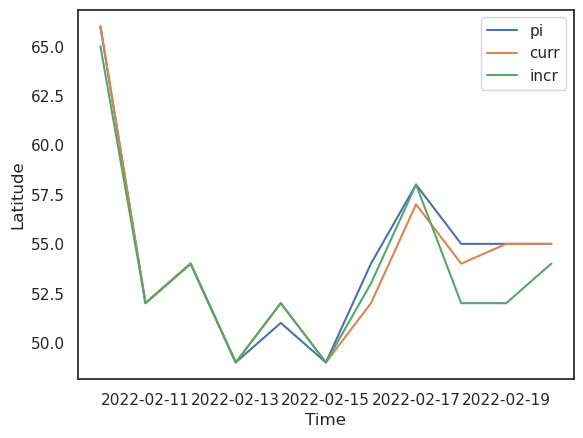

In [16]:
plt.figure()

projection = ccrs.PlateCarree()

plt.plot(jet['pi'].time,jet_loc['pi'])
plt.plot(jet['pi'].time, jet_loc['curr'])
plt.plot(jet['pi'].time, jet_loc['incr'])
plt.legend(['pi','curr', 'incr'])



plt.xlabel('Time')
plt.ylabel('Latitude')



In [19]:
lat = jet['pi'].latitude 
t = jet['pi'].time
level = np.linspace(-30,30, 13)

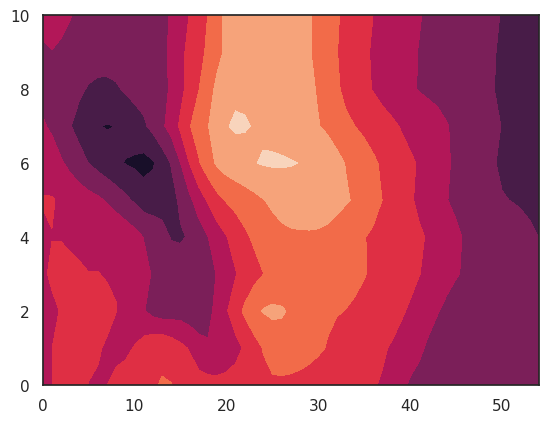

In [41]:
plt.contourf(jet['pi'])

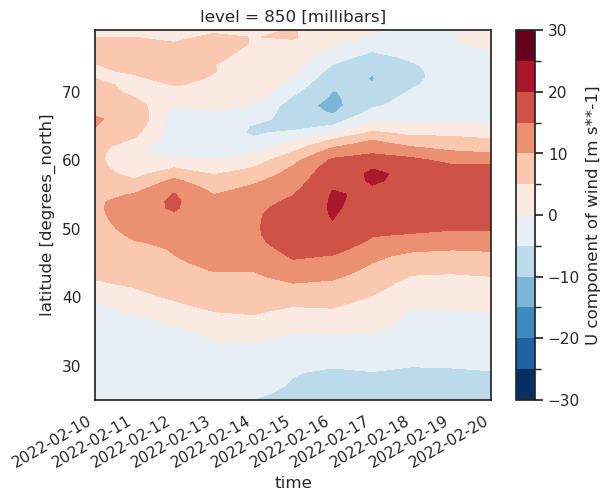

In [40]:

jet['pi'].plot.contourf(x='time', y ='latitude',levels=level)


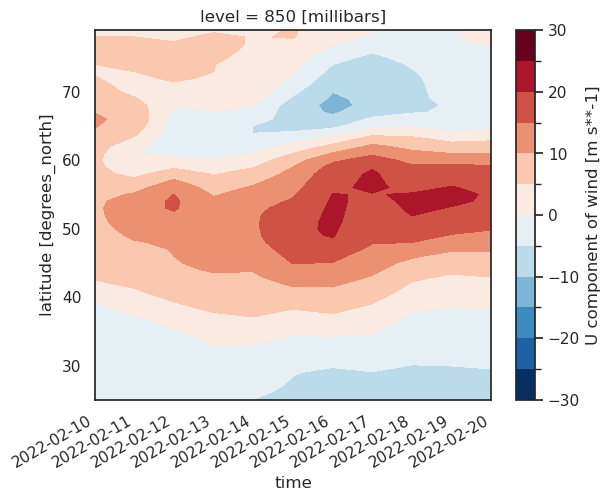

In [35]:
jet['curr'].plot.contourf(x='time', y ='latitude',levels=level)



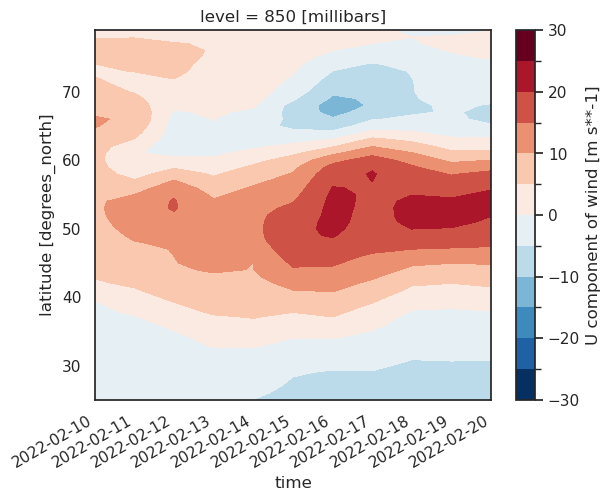

In [36]:
jet['incr'].plot.contourf(x='time', y ='latitude',levels=level)


 jet location is based on daily mean
850 hPa zonal wind. 
separation between the eddy driven jet

 In order to focus on the eastern North Atlantic and Western Europe, the wind is
averaged over the longitudes between 40°W and 10°E.

The resulting field is subsequently array([250, 500, 700, 850], dtype=int32)
low-pass filtered
(Lanczos, 10 day cutoff frequency) and the latitudinal location of the maximum westerly wind speed is
taken

The anomalies of the jet
intensity are calculated by subtracting the winter (December–February, DJF) 850 hPa long-term mean.
